## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras



In [3]:
train=pd.read_csv(r"C:\Users\pooja\OneDrive\डेस्कटॉप\Dataset\train.csv")
test=pd.read_csv(r"C:\Users\pooja\OneDrive\डेस्कटॉप\Dataset\train.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train data


In [18]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, '9')

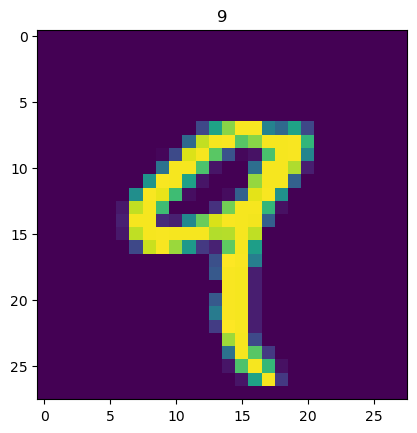

In [19]:
plt.imshow(X_train[4] )
plt.title(y_train[4])

Text(0.5, 1.0, '1')

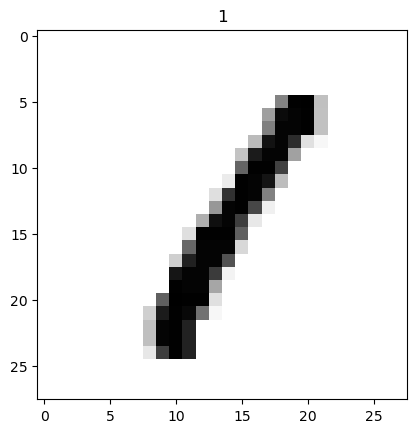

In [20]:
plt.imshow(X_train[3], cmap='binary')
plt.title(y_train[3])

In [21]:
def plot_input_img(i):
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.show()

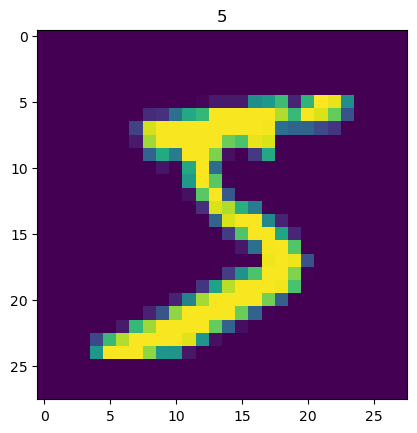

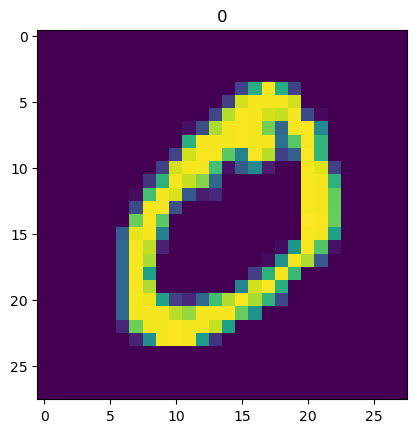

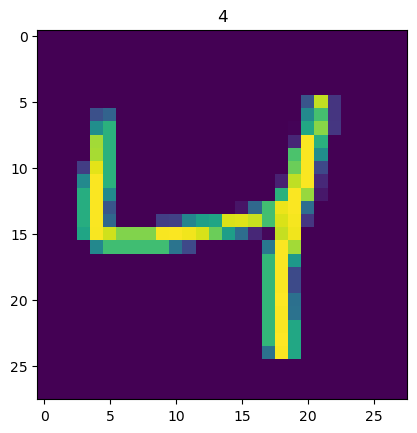

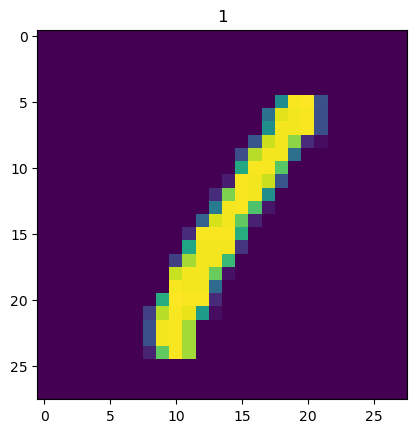

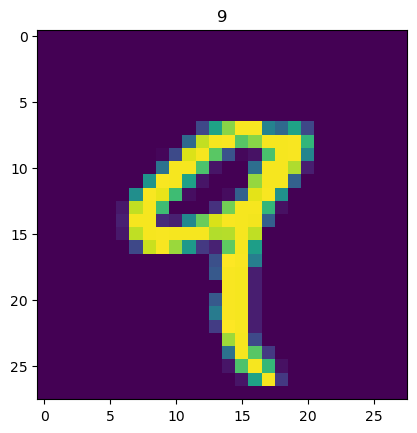

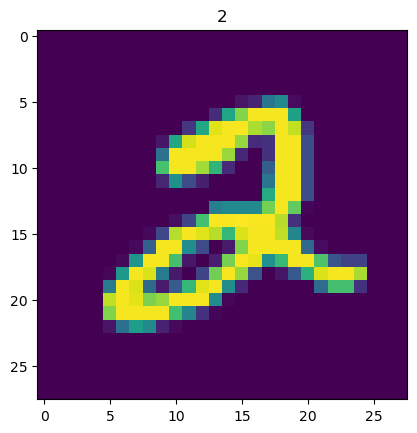

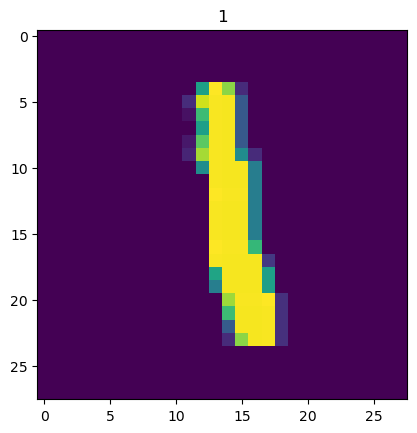

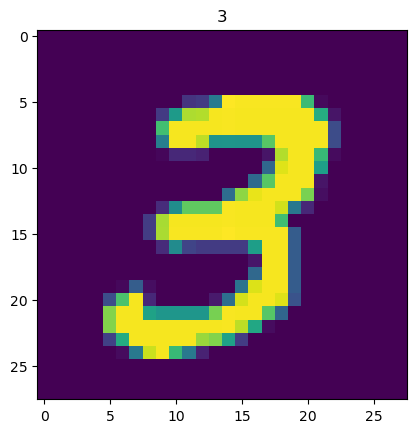

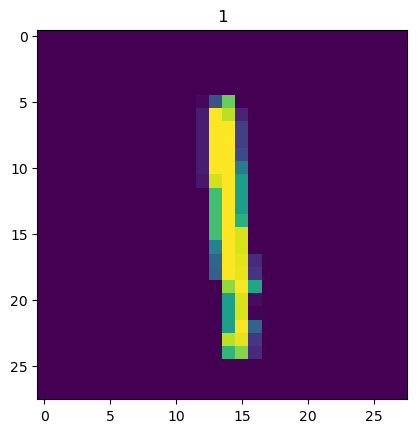

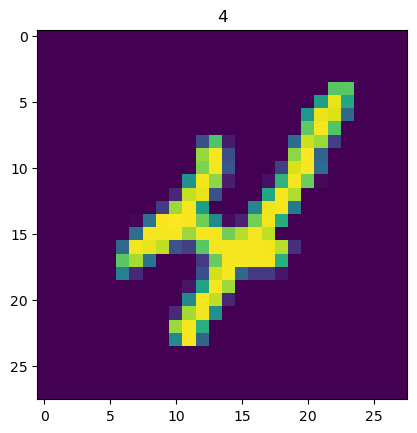

In [11]:
for i in range(10):
    plot_input_img(i)

## Pre-Processing

In [22]:
# Normalizing the image to [0,1] range
X_train = X_train.astype (np.float32)/255
X_test = X_test.astype (np.float32)/255

# REshape / expand the dimentions of images to (28,28,1)
X_train= np.expand_dims (X_train, -1) 
X_test= np.expand_dims(X_test, -1)

# convert classes to one hot vectors
y_train = keras.utils.to_categorical (y_train) 
y_test = keras.utils.to_categorical (y_test)

## Model building

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [24]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1),activation="relu") )
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation= 'relu')) 
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout (0.25))

model.add(Dense (10, activation="softmax"))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [26]:
model.compile(optimizer= 'adam', loss = keras. losses.categorical_crossentropy, metrics=['accuracy'])

In [27]:
# Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

#Earlystopping

es= EarlyStopping (monitor='val_acc', min_delta=0.01, patience =4, verbose= 1)

#Model Check Point

mc=ModelCheckpoint("./bestmodel.h5", mobitor= "val_acc", verbose= 1, save_best_only= True)

cb=[es,mc]

## Model Training

In [28]:
his=model.fit(X_train, y_train, epochs=5, validation_split=0.3,callbacks=cb)

Epoch 1/5
1310/1313 [============================>.] - ETA: 0s - loss: 0.2206 - accuracy: 0.9309WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 1: val_loss improved from inf to 0.09016, saving model to .\bestmodel.h5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.2203 - accuracy: 0.9310 - val_loss: 0.0902 - val_accuracy: 0.9734
Epoch 2/5
   4/1313 [..............................] - ETA: 24s - loss: 0.0458 - accuracy: 0.9844

C:\Users\pooja\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - ETA: 0s - loss: 0.0736 - accuracy: 0.9772WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 2: val_loss improved from 0.09016 to 0.05867, saving model to .\bestmodel.h5
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0736 - accuracy: 0.9772 - val_loss: 0.0587 - val_accuracy: 0.9828
Epoch 3/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9832WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 3: val_loss improved from 0.05867 to 0.04792, saving model to .\bestmodel.h5
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0542 - accuracy: 0.9832 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 4/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0443 - ac

##  Saving and Evaluation

In [31]:
Saved_Model=keras.models.load_model("bestmodel.h5")

In [32]:
Score=Saved_Model.evaluate(X_test,y_test)

print(f"the model accuracy is {Score[1]}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0317 - accuracy: 0.9889
the model accuracy is 0.9889000058174133
